In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import floor
from keras import models
from keras import layers
from keras import optimizers

In [2]:
# RELU
def relu(x):
    return x * (x > 0)

def drelu(x):
    return 1. * (x > 0)

#IDENTIDAD
def iden(X):
    return X
def diden(X):
    return 1

#SIGMOIDE
def sigmoid(X):
    return 1/(1+np.exp(-X))
def dsigmoid(X):
    return sigmoid(X)*(1-sigmoid(X))

#TANGENTE HIPORBÓLICA
def tanh(X):
    return np.tanh(X)
def dtanh(X):
    return 1-tanh(X)**2

#Definimos el forward propagation por si se quiere evaluar un determiado valor después de haber entrenado la red
def forward(X,W1,b1,W2,b2,activation):
    z1=np.dot(X,W1)+b1
    a1=activation(z1)
    z2=np.dot(a1,W2)+b2
    a2=z2
    return a2

def split(X,Y,porcent): #El porcentaje debe estar dado entre 0 y 1
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    
    return X_learn,Y_learn,X_val,Y_val

#función de coste:
def error(C):
    m=len(C)
    e=(1/(2*m))*np.linalg.norm(C)**2
    return e



In [3]:
def neuralnet(X,Y,nodos,batch_size,learning_rate,epocas,activation,dactivation):
    #Definimos la estructura de la red
    n_entradas=len(X[0])
    n_salidas=len(Y[0])
    
    #definimos los conjuntos de aprendizaje y validación 
    X_learn,Y_learn,X_val,Y_val = split(X,Y,batch_size)
    
    #forward
    W1=np.random.randn(n_entradas,nodos)
    W2=np.random.randn(nodos,n_salidas)
    b1=np.random.randn(nodos)
    b2=np.random.randn(n_salidas)
    
    #z1=np.dot(X_learn,W1)+b1
    #a1=activation(z1)
    #z2=np.dot(a1,W2)+b2
    #a2=z2
    
    #épocas
    errores=[]
    validacion=[]
    for i in range(epocas+1):
        #Forward
        z1=np.dot(X_learn,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        
        #backpropagation
        delta2 = a2-Y_learn
        delta1 = (delta2).dot(W2.T)*dactivation(z1)
        
        errores.append(error(delta2)) #guardamos el error de cada época

        W2 -= learning_rate * a1.T.dot(delta2)
        b2 -= learning_rate * (delta2).sum(axis=0)

        W1 -= learning_rate * X_learn.T.dot(delta1)
        b1 -= learning_rate * (delta1).sum(axis=0)
        print("Época %d, coste %f" %(int(i),error(delta2)))
        
        #Ahora validamos el modelo
        z1=np.dot(X_val,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        delta = a2-Y_val
        validacion.append(error(delta))
        
    plt.plot(range(i+1),errores,color='darkcyan',label='Aprendizaje')
    plt.plot(range(i+1),validacion,color='darkred',label='Validación')
    plt.grid()
    plt.legend()
    return W1,b1,W2,b2
        



In [11]:
X1=np.array([[0.07  ],
       [0.09  ],
       [0.12  ],
       [0.17  ],
       [0.1791],
       [0.1993],
       [0.2   ],
       [0.27  ],
       [0.28  ],
       [0.3519],
       [0.3802],
       [0.4   ],
       [0.4004],
       [0.4247],
       [0.4497],
       [0.47  ],
       [0.4783],
       [0.48  ],
       [0.5929],
       [0.6797],
       [0.7812],
       [0.8754],
       [0.88  ],
       [0.9   ],
       [1.037 ],
       [1.3   ],
       [1.363 ],
       [1.43  ],
       [1.53  ],
       [1.75  ],
       [1.965 ]])
Y1=np.array([[ 69. ],
       [ 69. ],
       [ 68.6],
       [ 83. ],
       [ 75. ],
       [ 75. ],
       [ 72.9],
       [ 77. ],
       [ 88.8],
       [ 83. ],
       [ 83. ],
       [ 95. ],
       [ 77. ],
       [ 87.1],
       [ 92.8],
       [ 89. ],
       [ 80.9],
       [ 97. ],
       [104. ],
       [ 92. ],
       [105. ],
       [125. ],
       [ 90. ],
       [117. ],
       [154. ],
       [168. ],
       [160. ],
       [177. ],
       [140. ],
       [202. ],
       [186.5]])

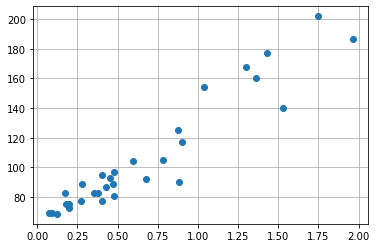

In [7]:
plt.plot(X,Y,'o')
plt.grid()

Época 0, coste 6252.317944
Época 1, coste 2470.352587
Época 2, coste 858.022662
Época 3, coste 494.671214
Época 4, coste 447.597486
Época 5, coste 426.109392
Época 6, coste 405.837444
Época 7, coste 385.709071
Época 8, coste 365.612892
Época 9, coste 345.536627
Época 10, coste 325.534039
Época 11, coste 305.708786
Época 12, coste 286.199067
Época 13, coste 267.164942
Época 14, coste 248.776741
Época 15, coste 231.201915
Época 16, coste 214.590104
Época 17, coste 199.059566
Época 18, coste 184.689006
Época 19, coste 171.516427
Época 20, coste 159.543487
Época 21, coste 148.742450
Época 22, coste 139.063442
Época 23, coste 130.440945
Época 24, coste 122.799257
Época 25, coste 116.056971
Época 26, coste 110.130578
Época 27, coste 104.937291
Época 28, coste 100.397182
Época 29, coste 96.434707
Época 30, coste 92.979710
Época 31, coste 89.968011
Época 32, coste 87.341642
Época 33, coste 85.048825
Época 34, coste 83.043760
Época 35, coste 81.286275
Época 36, coste 79.741394
Época 37, coste 7

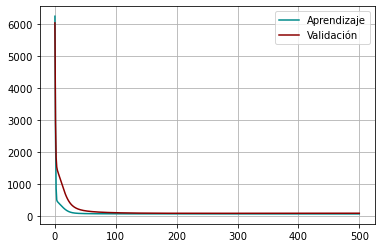

In [8]:
W1,b1,W2,b2=neuralnet(X,Y,50,0.9,0.001,500,activation=sigmoid,dactivation=dsigmoid)

Epoch 1/100
6/6 [==============================] - 2s 272ms/step - loss: 16388.8513 - val_loss: 8644.0439
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 11416.5545 - val_loss: 7073.2231
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 8609.4051 - val_loss: 5819.1831
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 5566.9603 - val_loss: 4833.6538
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 5729.0130 - val_loss: 4061.7981
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 5982.7643 - val_loss: 3407.8550
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 6202.1083 - val_loss: 2859.2996
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 5375.4983 - val_loss: 2377.8430
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 3135.5258 - val_loss: 1961.1095
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - los

Text(0.5, 1.0, 'Error durante el entrenamiento')

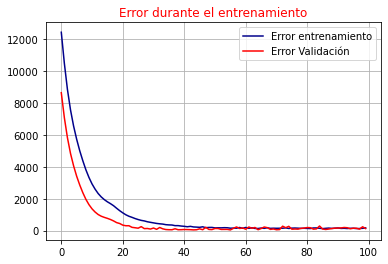

In [9]:
nodos=10
split_size=0.8
learning_rate=0.1
epocas=100

#Separamos los datos en validación y entrenamiento
X_learn,Y_learn,X_val,Y_val=split(X,Y,split_size)

#Armamos el modelo con estructura 'Sequential'
model=models.Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
capa1=layers.Dense(nodos, input_shape=(len(X[0]),),use_bias=1,activation='sigmoid')
#para la capa de salida usamos Id como activación
salida=layers.Dense(len(Y[0]),use_bias=1)

#armamos el modelo
model.add(capa1)
model.add(salida)
#Ahora definimos el paso de compilación, con learning rate=0.001
#Función de error cuadrático medio


model.compile(optimizer=optimizers.RMSprop(lr=learning_rate), loss='mse')

#por último traemos los datos de entrenamiento y los procesamos con 'fit()'
history=model.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),batch_size=4,epochs=epocas,shuffle=True)

error=history.history['loss']
exac=history.history['val_loss']
epochs=np.arange(0,len(error))
plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
plt.plot(epochs,exac,label='Error Validación',color='r')
plt.legend()
plt.grid()
plt.title('Error durante el entrenamiento',color='red')

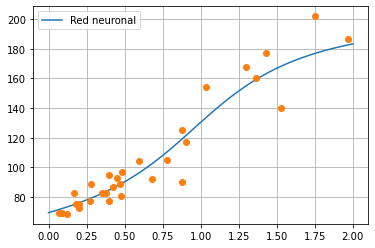

In [10]:
z=np.linspace(0,2,60)
z=z.reshape(60,1)
plt.plot(z,forward(z,W1,b1,W2,b2,sigmoid),label='Red neuronal')
plt.plot(X,Y,'o')
plt.legend()
plt.grid()

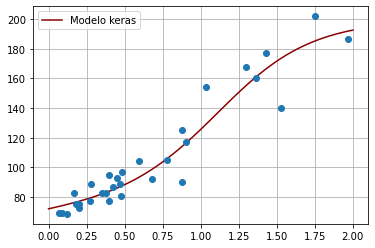

In [11]:
plt.plot(z,model.predict(z),label='Modelo keras',color='darkred')
plt.plot(X,Y,'o')
plt.grid()
plt.legend()

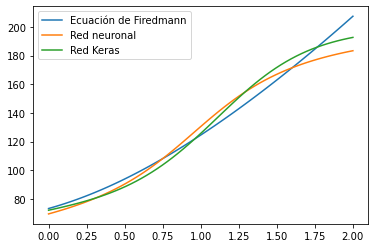

In [12]:
def Hlcdm(z, Om=0.27, H0=73.24):
    return H0 * np.sqrt(Om*(1+z)**3 + 1 - Om)
w = np.linspace(0,2, 100)
hz = Hlcdm(w)
plt.plot(w, hz,label='Ecuación de Firedmann')
plt.plot(z,forward(z,W1,b1,W2,b2,sigmoid),label='Red neuronal')
plt.plot(z,model.predict(z),label='Red Keras')
plt.legend()

### Generación de datos sintéticos a partir de la ecuación de friedmann

In [38]:
#Función a emular
def Hlcdm(z, Om=0.27, H0=73.24):
    return H0 * np.sqrt(Om*(1+z)**3 + 1 - Om)


X=2.3*np.random.rand(1000,1)
Y=Hlcdm(X, Om=0.27, H0=73.24)


Época 0, coste 10485.843612
Época 1, coste 8872.369951
Época 2, coste 7105.205820
Época 3, coste 5570.920096
Época 4, coste 4315.773156
Época 5, coste 3280.375221
Época 6, coste 2543.984838
Época 7, coste 2040.732001
Época 8, coste 1712.638910
Época 9, coste 1495.195382
Época 10, coste 1346.420261
Época 11, coste 1237.268534
Época 12, coste 1146.486589
Época 13, coste 1058.347130
Época 14, coste 966.486921
Época 15, coste 877.121238
Época 16, coste 791.307038
Época 17, coste 709.761117
Época 18, coste 637.912334
Época 19, coste 574.742001
Época 20, coste 518.557390
Época 21, coste 468.523195
Época 22, coste 424.011337
Época 23, coste 384.502218
Época 24, coste 349.500180
Época 25, coste 318.490396
Época 26, coste 290.956116
Época 27, coste 266.419756
Época 28, coste 244.477780
Época 29, coste 224.815935
Época 30, coste 207.195548
Época 31, coste 191.417144
Época 32, coste 177.289544
Época 33, coste 164.623102
Época 34, coste 153.238021
Época 35, coste 142.972539
Época 36, coste 133.685

Época 595, coste 2.358438
Época 596, coste 2.310724
Época 597, coste 2.339040
Época 598, coste 2.292150
Época 599, coste 2.319913
Época 600, coste 2.273827
Época 601, coste 2.301051
Época 602, coste 2.255750
Época 603, coste 2.282449
Época 604, coste 2.237916
Época 605, coste 2.264102
Época 606, coste 2.220321
Época 607, coste 2.246007
Época 608, coste 2.202960
Época 609, coste 2.228158
Época 610, coste 2.185828
Época 611, coste 2.210551
Época 612, coste 2.168924
Época 613, coste 2.193182
Época 614, coste 2.152241
Época 615, coste 2.176047
Época 616, coste 2.135777
Época 617, coste 2.159141
Época 618, coste 2.119528
Época 619, coste 2.142461
Época 620, coste 2.103490
Época 621, coste 2.126003
Época 622, coste 2.087660
Época 623, coste 2.109762
Época 624, coste 2.072035
Época 625, coste 2.093736
Época 626, coste 2.056609
Época 627, coste 2.077919
Época 628, coste 2.041382
Época 629, coste 2.062310
Época 630, coste 2.026348
Época 631, coste 2.046903
Época 632, coste 2.011505
Época 633, c

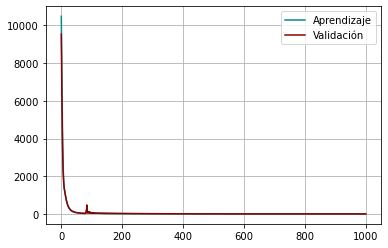

In [39]:
W1,b1,W2,b2=neuralnet(X,Y,10,0.2,0.0001,1000,activation=sigmoid,dactivation=dsigmoid)

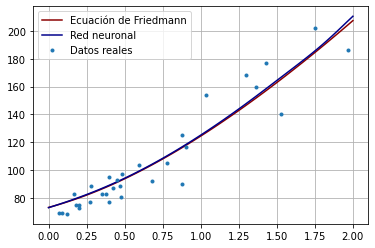

In [42]:
z=np.linspace(0,2,60)
z=z.reshape(60,1)
plt.plot(z,Hlcdm(z, Om=0.27, H0=73.24),color='darkred',label='Ecuación de Friedmann')
plt.plot(z,forward(z,W1,b1,W2,b2,sigmoid),label='Red neuronal',color='darkblue')
plt.plot(X1,Y1,'.', label='Datos reales')
plt.legend()
plt.grid()

Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 30259.7283 - val_loss: 30919.7090
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 21080.9727 - val_loss: 24543.5469
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 16797.9523 - val_loss: 19604.5020
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 11355.5481 - val_loss: 15453.2422
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 8602.8352 - val_loss: 12264.5566
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 8290.6500 - val_loss: 9764.7754
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 5039.4594 - val_loss: 7246.9795
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 3988.4991 - val_loss: 5577.2681
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 2491.2702 - val_loss: 4113.4980
Epoch 10/100
20/20 [=========================

Epoch 81/100
20/20 [==============================] - 0s 3ms/step - loss: 16.2386 - val_loss: 6.8463
Epoch 82/100
20/20 [==============================] - 0s 3ms/step - loss: 8.9982 - val_loss: 7.3229
Epoch 83/100
20/20 [==============================] - 0s 3ms/step - loss: 3.7610 - val_loss: 10.6697
Epoch 84/100
20/20 [==============================] - 0s 3ms/step - loss: 11.2721 - val_loss: 78.2326
Epoch 85/100
20/20 [==============================] - 0s 3ms/step - loss: 10.9576 - val_loss: 9.3130
Epoch 86/100
20/20 [==============================] - 0s 3ms/step - loss: 9.8155 - val_loss: 9.1470
Epoch 87/100
20/20 [==============================] - 0s 3ms/step - loss: 11.1488 - val_loss: 14.8532
Epoch 88/100
20/20 [==============================] - 0s 3ms/step - loss: 13.0584 - val_loss: 33.7022
Epoch 89/100
20/20 [==============================] - 0s 3ms/step - loss: 21.7531 - val_loss: 7.1958
Epoch 90/100
20/20 [==============================] - 0s 3ms/step - loss: 10.6288 - val_lo

Text(0.5, 1.0, 'Error durante el entrenamiento')

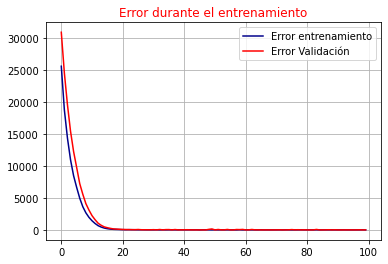

In [17]:
nodos=10
split_size=0.8
learning_rate=0.1
epocas=100

#Separamos los datos en validación y entrenamiento
X_learn,Y_learn,X_val,Y_val=split(X,Y,split_size)

#Armamos el modelo con estructura 'Sequential'
model=models.Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
capa1=layers.Dense(nodos, input_shape=(len(X[0]),),use_bias=1,activation='sigmoid')
#para la capa de salida usamos Id como activación
salida=layers.Dense(len(Y[0]),use_bias=1)

#armamos el modelo
model.add(capa1)
model.add(salida)
#Ahora definimos el paso de compilación, con learning rate=0.001
#Función de error cuadrático medio


model.compile(optimizer=optimizers.RMSprop(lr=learning_rate), loss='mse')

#por último traemos los datos de entrenamiento y los procesamos con 'fit()'
history=model.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),batch_size=4,epochs=epocas,shuffle=True)

error=history.history['loss']
exac=history.history['val_loss']
epochs=np.arange(0,len(error))
plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
plt.plot(epochs,exac,label='Error Validación',color='r')
plt.legend()
plt.grid()
plt.title('Error durante el entrenamiento',color='red')

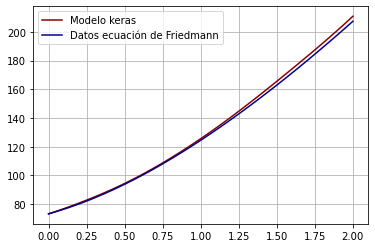

In [21]:
plt.plot(z,model.predict(z),label='Modelo keras',color='darkred')
plt.plot(z,Hlcdm(z, Om=0.27, H0=73.24),color='darkblue',label='Datos ecuación de Friedmann')
#plt.plot(X,Y,'o')
plt.grid()
plt.legend()

# $\rho$ cosmológicas


In [4]:
from scipy.integrate import odeint

In [9]:
#Condiciones iniciales
Or = 0.0001
Om = 0.3
Ol = 1. - Or - Om
H0 = 70.

#Right hand side of the equations
def RHS(Or, Om, lna, gamma=0):
    Ol = 1. - Or - Om
    #x, y, z, H = Omega_i
    #x, y, z = Omega_i
    #pi = (3*Or + 4*Om)
    #return [x*(-3 + pi), y*(-4 + pi), z*pi, -0.5*H*pi]
    return [Or*(-3 + (3*Or + 4*Om)), Om*(-4 + (3*Or + 4*Om)), Ol*(3*Or + 4*Om)]
#omegas
#y0     = [Om, Or, Ol, H0]
#y0     = [Om, Or, Ol]

#Intervalo muy grande, solo para visualizacion de \Omegas
lna    = np.linspace(0, -12, 1000)





result = odeint(RHS, y0, lna)